# Project imports

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame as df
from scipy.stats import zscore
import seaborn as sns
import re
import os

from ydata_profiling import ProfileReport
import sweetviz as sv

# Opening CSV

In [28]:
df = pd.read_csv("./data/OnlinePaymentsFraudDetection.csv", na_values=[' ', '_', '_______'], low_memory=False)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Remoção das linhas is fraud = 0

In [14]:
#df = df.loc[df['isFraud'] != 0]

In [16]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


# Passo 2: Verificando os Tipos de Dados e Resumo Estatístico

In [17]:
# Verificar os tipos de dados
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [19]:
# Resumo estatístico das colunas numéricas
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,8213.000000,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8213.0,8213.000000
mean,368.413856,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,1.0,0.001948
std,216.388690,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,0.0,0.044097
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,181.000000,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
50%,367.000000,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,1.0,0.000000
75%,558.000000,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,1.0,0.000000
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0,1.000000


In [20]:
# Verificar se há valores ausentes
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [21]:
# Criar um dicionário para armazenar o número de valores únicos por coluna
num_valores_unicos = {}

# Iterar sobre cada coluna e contar os valores únicos
for coluna in df.columns:
    num_valores_unicos[coluna] = df[coluna].nunique()

# Converter o dicionário em uma Series para facilitar a visualização
serie_num_valores_unicos = pd.Series(num_valores_unicos)

# Exibir o número de valores únicos por coluna
print("Número de valores únicos por coluna:")
serie_num_valores_unicos

Número de valores únicos por coluna:


step               741
type                 2
amount            3977
nameOrig          8213
oldbalanceOrg     4094
newbalanceOrig     145
nameDest          8169
oldbalanceDest    2863
newbalanceDest    4067
isFraud              1
isFlaggedFraud       2
dtype: int64

# Passo 3: Análise das Colunas

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


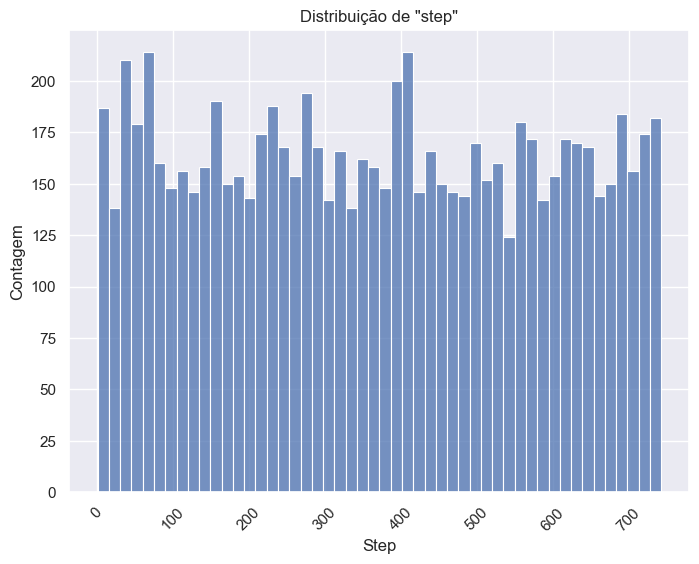

In [22]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
sns.histplot(data=df, x='step', bins=50)
plt.title('Distribuição de "step"')
plt.xlabel('Step')
plt.ylabel('Contagem')
plt.show()

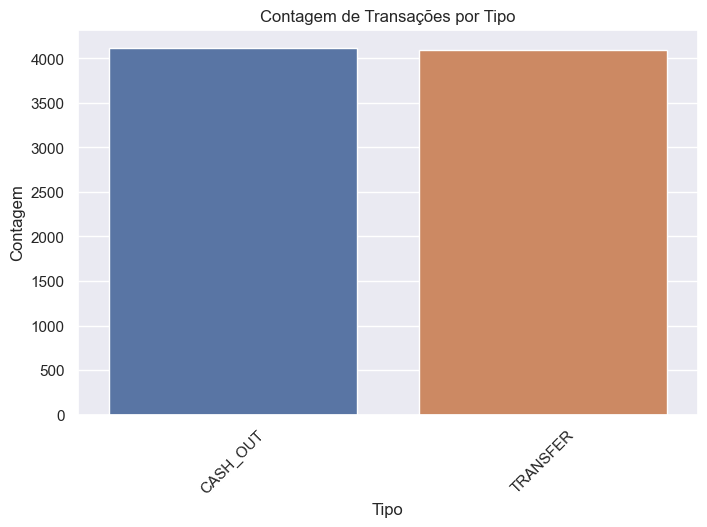

In [23]:
# Contagem de valores únicos em 'type'
type_counts = df['type'].value_counts()

# Gráfico de contagem de 'type'
plt.figure(figsize=(8, 5))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Contagem de Transações por Tipo')
plt.xlabel('Tipo')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


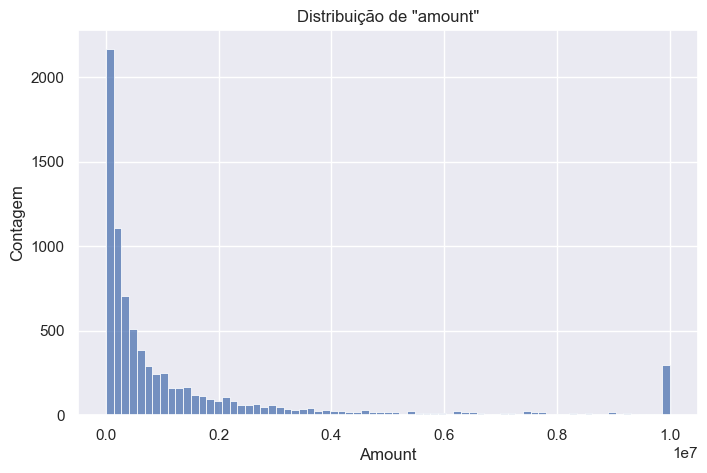

In [24]:
# Histograma da coluna 'amount'
plt.figure(figsize=(8, 5))
sns.histplot(df['amount'])
plt.title('Distribuição de "amount"')
plt.xlabel('Amount')
plt.ylabel('Contagem')
plt.show()

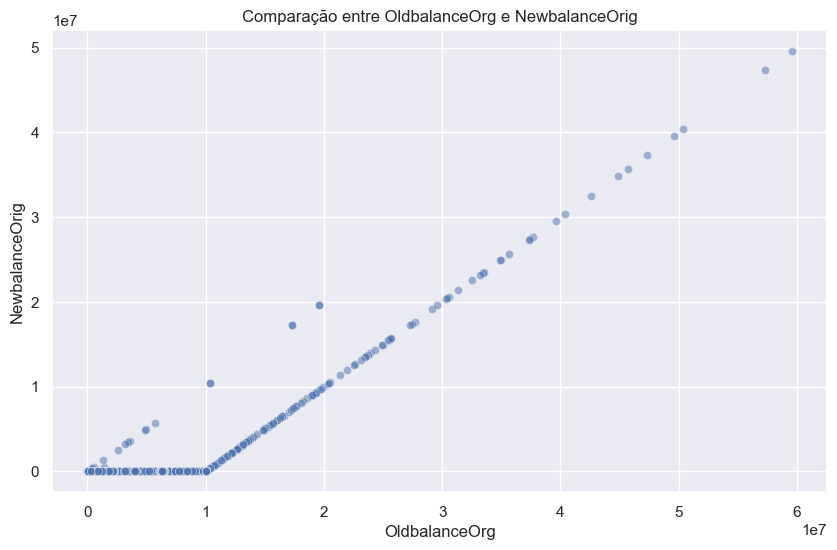

In [25]:
# Comparação entre 'oldbalanceOrg' e 'newbalanceOrig'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', data=df, alpha=0.5)
plt.title('Comparação entre OldbalanceOrg e NewbalanceOrig')
plt.xlabel('OldbalanceOrg')
plt.ylabel('NewbalanceOrig')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


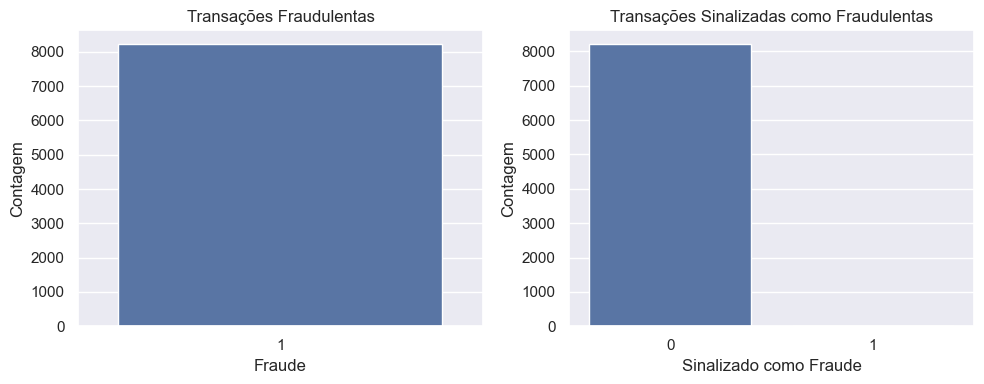

In [26]:
# Contagem de transações fraudulentas e sinalizadas como fraudulentas
fraud_counts = df['isFraud'].value_counts()
flagged_counts = df['isFlaggedFraud'].value_counts()

# Gráfico de barras para 'isFraud'
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Transações Fraudulentas')
plt.xlabel('Fraude')
plt.ylabel('Contagem')

# Gráfico de barras para 'isFlaggedFraud'
plt.subplot(1, 2, 2)
sns.barplot(x=flagged_counts.index, y=flagged_counts.values)
plt.title('Transações Sinalizadas como Fraudulentas')
plt.xlabel('Sinalizado como Fraude')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()
